In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
df_main = pd.read_csv(r"Global YouTube Statistics.csv", encoding='windows-1254')

In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [4]:
df_main.head()
df_main.shape

(995, 28)

In [6]:
df=df_main.copy()
isnull_sum=df_main.isnull().sum()
isnull_sum

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date 

<Axes: >

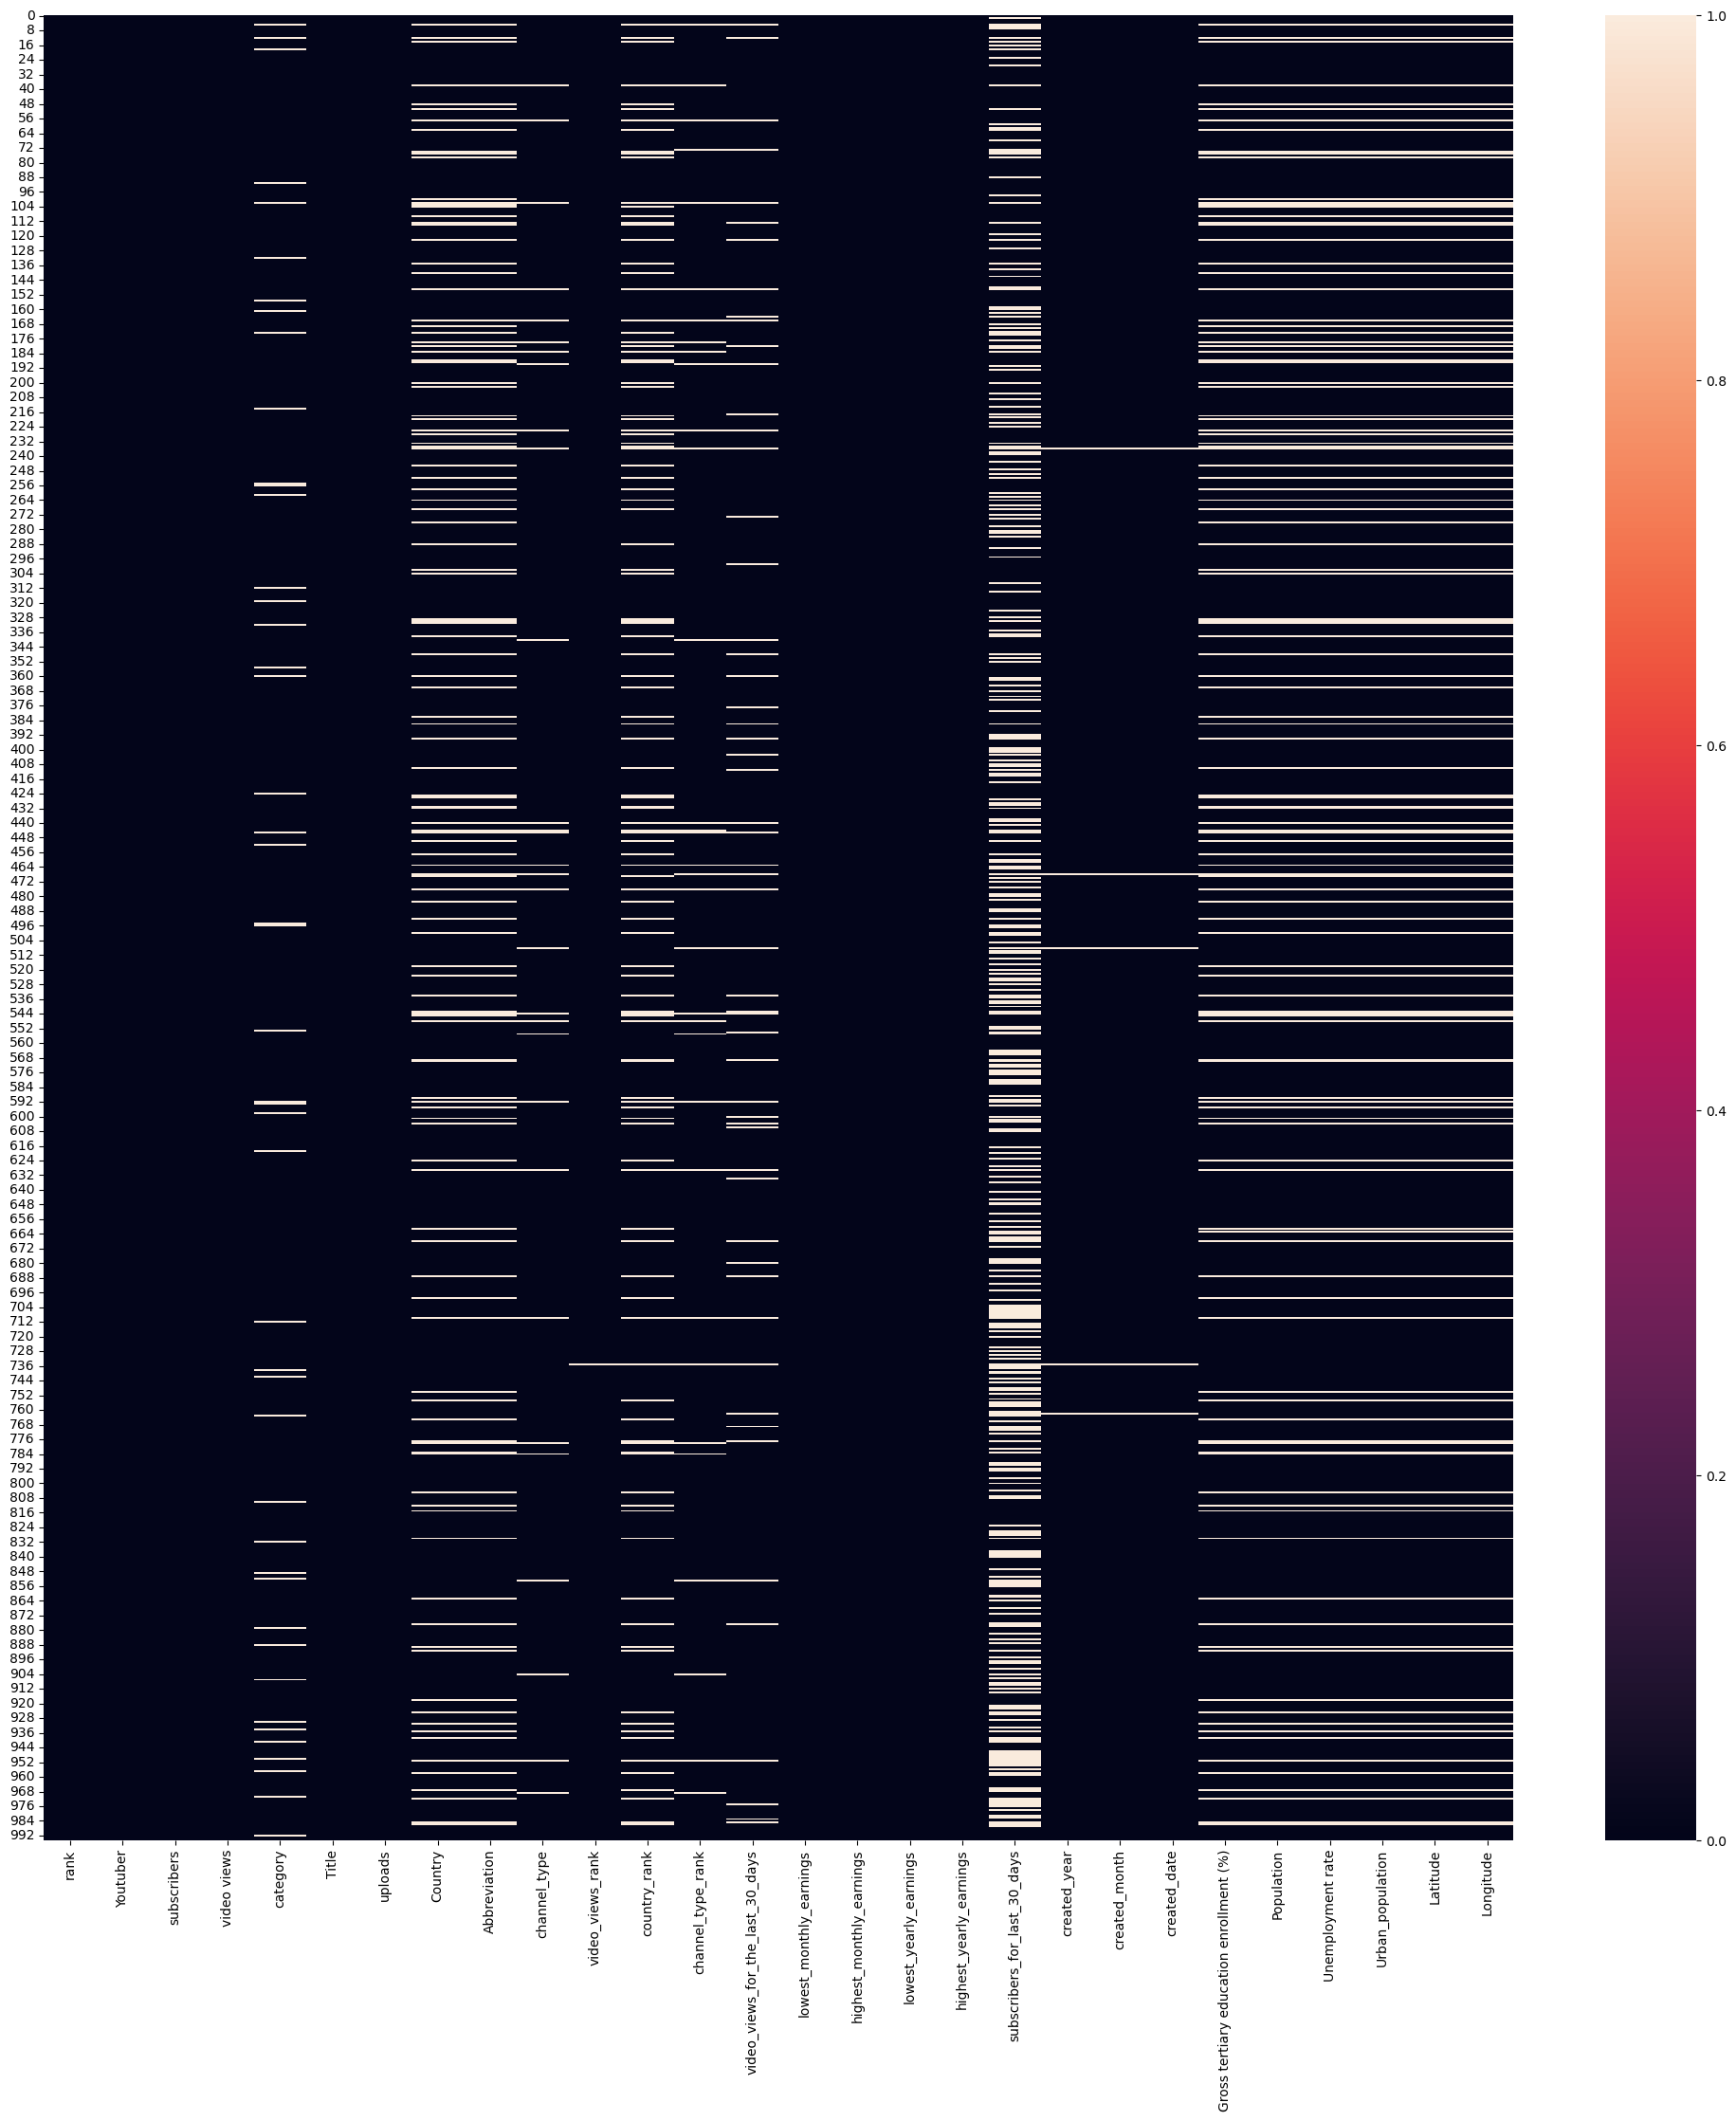

In [7]:
plt.figure(figsize=(25,25))
sns.heatmap(df.isnull())

In [8]:
# finding the numerical variable which have mising value
num_vars = df.select_dtypes(include=["int64", "float64"]).columns
num_vars_miss = [var for var in num_vars if isnull_sum[var]>0]
num_vars_miss

['video_views_rank',
 'country_rank',
 'channel_type_rank',
 'video_views_for_the_last_30_days',
 'subscribers_for_last_30_days',
 'created_year',
 'created_date',
 'Gross tertiary education enrollment (%)',
 'Population',
 'Unemployment rate',
 'Urban_population',
 'Latitude',
 'Longitude']

In [9]:
# finding the categorical variable which have mising value
cat_vars = df.select_dtypes(include=["O"]).columns
cat_vars_miss = [var for var in cat_vars if isnull_sum[var]>0]
cat_vars_miss

['category', 'Country', 'Abbreviation', 'channel_type', 'created_month']

In [10]:
#give us coloums use value 
for data in cat_vars_miss:
    print(df[data].unique())

['Music' 'Film & Animation' 'Entertainment' 'Education' 'Shows' nan
 'People & Blogs' 'Gaming' 'Sports' 'Howto & Style' 'News & Politics'
 'Comedy' 'Trailers' 'Nonprofits & Activism' 'Science & Technology'
 'Movies' 'Pets & Animals' 'Autos & Vehicles' 'Travel & Events']
['India' 'United States' nan 'Japan' 'Russia' 'South Korea'
 'United Kingdom' 'Canada' 'Brazil' 'Argentina' 'Chile' 'Cuba'
 'El Salvador' 'Pakistan' 'Philippines' 'Thailand' 'Colombia' 'Barbados'
 'Mexico' 'United Arab Emirates' 'Spain' 'Saudi Arabia' 'Indonesia'
 'Turkey' 'Venezuela' 'Kuwait' 'Jordan' 'Netherlands' 'Singapore'
 'Australia' 'Italy' 'Germany' 'France' 'Sweden' 'Afghanistan' 'Ukraine'
 'Latvia' 'Switzerland' 'Vietnam' 'Malaysia' 'China' 'Iraq' 'Egypt'
 'Andorra' 'Ecuador' 'Morocco' 'Peru' 'Bangladesh' 'Finland' 'Samoa']
['IN' 'US' nan 'JP' 'RU' 'KR' 'GB' 'CA' 'BR' 'AR' 'CL' 'CU' 'SV' 'PK' 'PH'
 'TH' 'CO' 'BB' 'MX' 'AE' 'ES' 'SA' 'ID' 'TR' 'VE' 'KW' 'JO' 'NL' 'SG'
 'AU' 'IT' 'DE' 'FR' 'SE' 'AF' 'UA' 'LV' '

In [11]:
num_var_mean = num_vars_miss
cat_vars_mode = cat_vars_miss
cat_vars_mode

['category', 'Country', 'Abbreviation', 'channel_type', 'created_month']

In [12]:
#different variable have use different method using you can change as your requirement
num_var_mean_imputer = Pipeline(steps=[("imputer", SimpleImputer(strategy="mean"))])
cat_vars_mode_imputer = Pipeline(steps=[("imputer", SimpleImputer(strategy="most_frequent"))])

In [13]:
#columntransformer(transformers=[("name_of_imputer",which stategy use(pipeline),which coloum)])
preprocessor = ColumnTransformer(transformers=[("mean_imputer", num_var_mean_imputer, num_var_mean),
                               ("mode_imputer", cat_vars_mode_imputer, cat_vars_mode)])

In [14]:
preprocessor.fit(df)

ColumnTransformer(transformers=[('mean_imputer',
                                 Pipeline(steps=[('imputer', SimpleImputer())]),
                                 ['video_views_rank', 'country_rank',
                                  'channel_type_rank',
                                  'video_views_for_the_last_30_days',
                                  'subscribers_for_last_30_days',
                                  'created_year', 'created_date',
                                  'Gross tertiary education enrollment (%)',
                                  'Population', 'Unemployment rate',
                                  'Urban_population', 'Latitude',
                                  'Longitude']),
                                ('mode_imputer',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['category', 'Country', 'Abbreviation',
                                  'channel_type', 'created_month'])])

In [15]:
preprocessor.transform

<bound method ColumnTransformer.transform of ColumnTransformer(transformers=[('mean_imputer',
                                 Pipeline(steps=[('imputer', SimpleImputer())]),
                                 ['video_views_rank', 'country_rank',
                                  'channel_type_rank',
                                  'video_views_for_the_last_30_days',
                                  'subscribers_for_last_30_days',
                                  'created_year', 'created_date',
                                  'Gross tertiary education enrollment (%)',
                                  'Population', 'Unemployment rate',
                                  'Urban_population', 'Latitude',
                                  'Longitude']),
                                ('mode_imputer',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 

In [16]:
preprocessor.named_transformers_["mean_imputer"].named_steps["imputer"].statistics_

array([ 5.54248904e+05,  3.86053470e+02,  7.45719335e+02,  1.75610285e+08,
        3.49079132e+05,  2.01263030e+03,  1.57464646e+01,  6.36277523e+01,
        4.30387267e+08,  9.27927752e+00,  2.24214982e+08,  2.66327828e+01,
       -1.41281464e+01])

In [17]:
preprocessor.named_transformers_["mode_imputer"].named_steps["imputer"].statistics_

array(['Entertainment', 'United States', 'US', 'Entertainment', 'Jan'],
      dtype=object)

In [18]:
df_clean = preprocessor.transform(df)
df_clean

array([[1.0, 1.0, 1.0, ..., 'IN', 'Music', 'Mar'],
       [4055159.0, 7670.0, 7423.0, ..., 'US', 'Games', 'Mar'],
       [48.0, 1.0, 1.0, ..., 'US', 'Entertainment', 'Feb'],
       ...,
       [129005.0, 867.0, 1202.0, ..., 'GB', 'Games', 'Sep'],
       [35112.0, 4.0, 69.0, ..., 'SE', 'Games', 'May'],
       [4568.0, 125.0, 44.0, ..., 'IN', 'Comedy', 'Aug']], dtype=object)

In [19]:
preprocessor.transformers_

[('mean_imputer',
  Pipeline(steps=[('imputer', SimpleImputer())]),
  ['video_views_rank',
   'country_rank',
   'channel_type_rank',
   'video_views_for_the_last_30_days',
   'subscribers_for_last_30_days',
   'created_year',
   'created_date',
   'Gross tertiary education enrollment (%)',
   'Population',
   'Unemployment rate',
   'Urban_population',
   'Latitude',
   'Longitude']),
 ('mode_imputer',
  Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent'))]),
  ['category', 'Country', 'Abbreviation', 'channel_type', 'created_month']),
 ('remainder', 'drop', [0, 1, 2, 3, 5, 6, 14, 15, 16, 17])]

In [20]:
df_clean_miss_var = pd.DataFrame(df_clean, columns=num_var_mean+cat_vars_mode)

In [21]:
df_clean_miss_var.head()

,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,category,Country,Abbreviation,channel_type,created_month
0,1.0,1.0,1.0,2258000000.0,2000000.0,2006.0,13.0,28.1,1366417754.0,5.36,471031528.0,20.593684,78.96288,Music,India,IN,Music,Mar
1,4055159.0,7670.0,7423.0,12.0,349079.132219,2006.0,5.0,88.2,328239523.0,14.7,270663028.0,37.09024,-95.712891,Film & Animation,United States,US,Games,Mar
2,48.0,1.0,1.0,1348000000.0,8000000.0,2012.0,20.0,88.2,328239523.0,14.7,270663028.0,37.09024,-95.712891,Entertainment,United States,US,Entertainment,Feb
3,2.0,2.0,1.0,1975000000.0,1000000.0,2006.0,1.0,88.2,328239523.0,14.7,270663028.0,37.09024,-95.712891,Education,United States,US,Education,Sep
4,3.0,2.0,2.0,1824000000.0,1000000.0,2006.0,20.0,28.1,1366417754.0,5.36,471031528.0,20.593684,78.96288,Shows,India,IN,Entertainment,Sep


In [22]:
df_clean_miss_var.isnull().sum().sum()

0

In [23]:
df_main["channel_type"].value_counts()

Entertainment    304
Music            216
People           101
Games             98
Comedy            51
Education         49
Film              42
Howto             36
News              30
Tech              17
Sports            13
Autos              3
Animals            3
Nonprofit          2
Name: channel_type, dtype: int64

In [24]:
df_clean_miss_var["channel_type"].value_counts()

Entertainment    334
Music            216
People           101
Games             98
Comedy            51
Education         49
Film              42
Howto             36
News              30
Tech              17
Sports            13
Autos              3
Animals            3
Nonprofit          2
Name: channel_type, dtype: int64

In [25]:
# no missing values variables index
remainder_vars_index = [0, 1, 2, 3, 5, 6, 14, 15, 16, 17]


In [26]:
# get no missing values variables name using there index
remainder_vars = [isnull_sum.keys()[var_index] for var_index in remainder_vars_index]
print(len(remainder_vars))
remainder_vars

10


['rank',
 'Youtuber',
 'subscribers',
 'video views',
 'Title',
 'uploads',
 'lowest_monthly_earnings',
 'highest_monthly_earnings',
 'lowest_yearly_earnings',
 'highest_yearly_earnings']

In [27]:
# concatinate X_train_clean_miss_var df and remainder_vars
df =  pd.concat([df_clean_miss_var,df_main[remainder_vars]], axis=1)

In [28]:
df.shape

(995, 28)

In [29]:
df.isnull().sum().sum()

0

<Axes: >

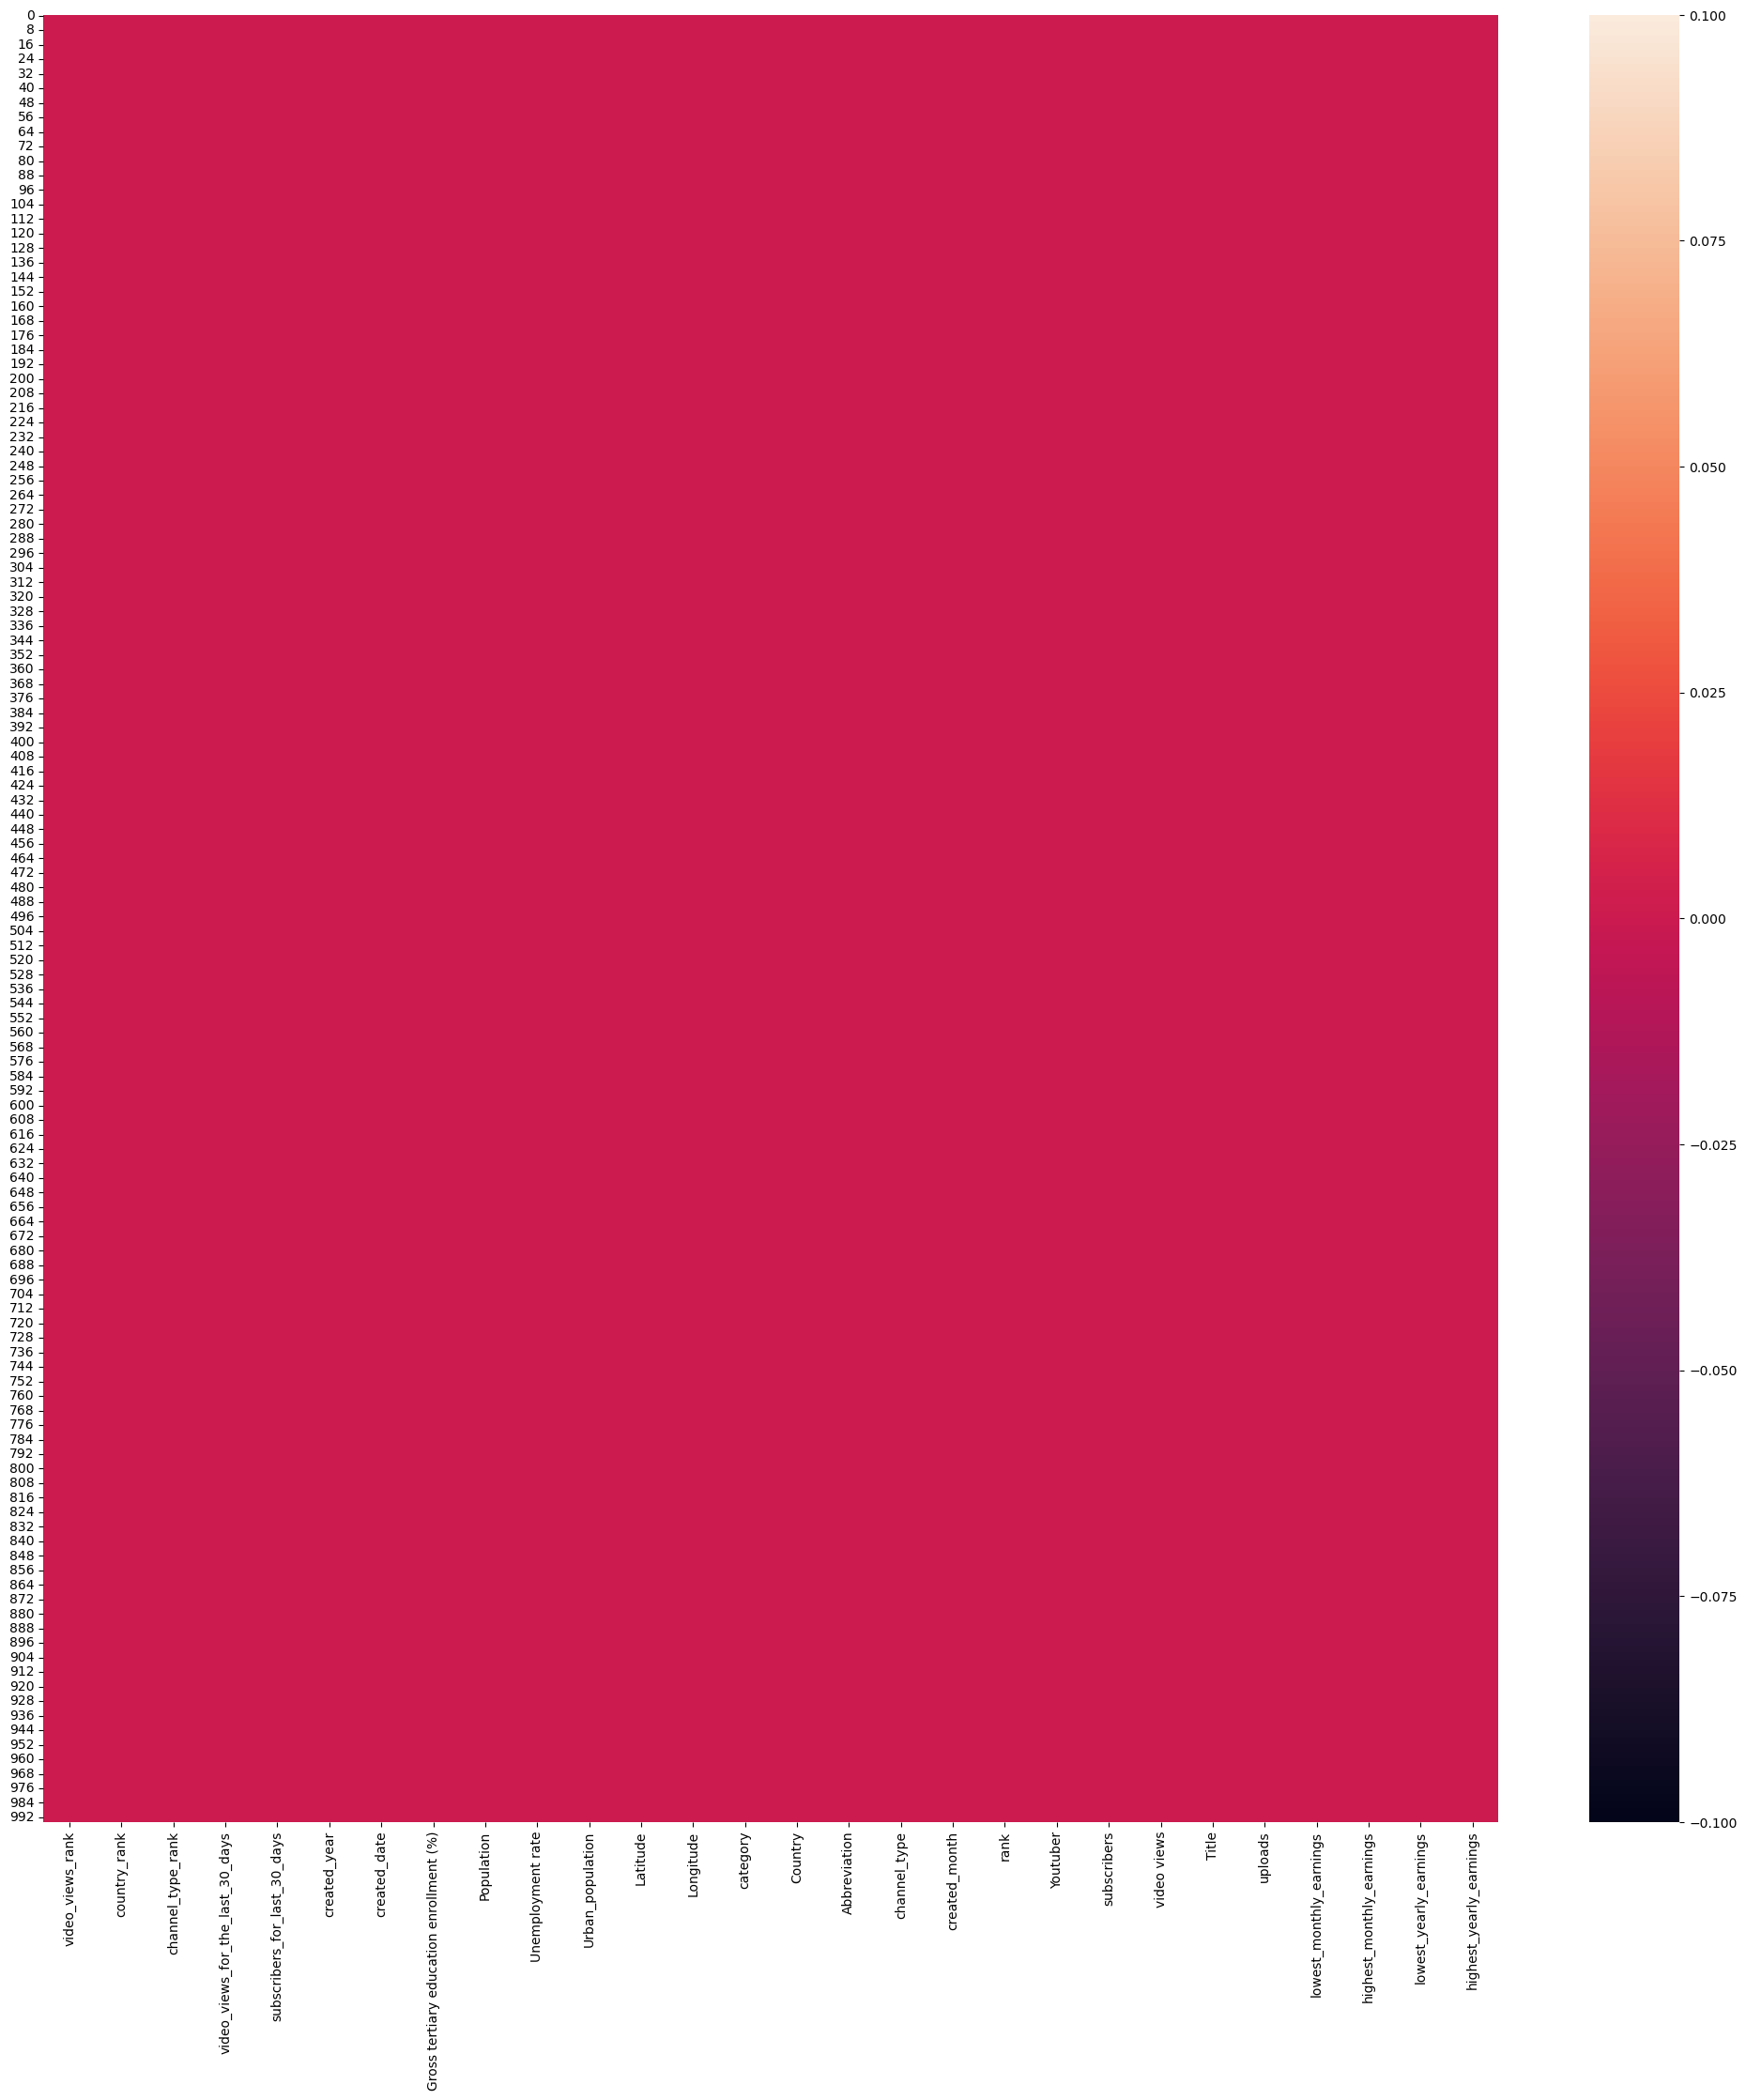

In [30]:
plt.figure(figsize=(25,25))
sns.heatmap(df.isnull())